# **K means clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Kmeans:

	def __init__(self, n_clusters, max_iter=100, random_state=123):
		self.n_clusters = n_clusters
		self.max_iter = max_iter
		self.random_state = random_state

	def initializ_centroids(self, X):
		np.random.RandomState(self.random_state)
		random_idx = np.random.permutation(X.shape[0])
		centroids = X[random_idx[:self.n_clusters]]
		return centroids

	def reassign_centroids(self, X, labels):
		centroids = np.zeros((self.n_clusters, X.shape[1]))
		# Your code goes here
		for k in range(self.n_clusters):
			centroids[k, :] = np.mean(X[labels == k, :], axis=0)
		return centroids

	def compute_distance(self, X, centroids):
		distance = np.zeros((X.shape[0], self.n_clusters))
		for k in range(self.n_clusters):
			row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
			distance[:, k] = np.square(row_norm)
		return distance

	def find_closest_cluster(self, distance):
		return np.argmin(distance, axis=1)

	def compute_sse(self, X, labels, centroids):
		distance = np.zeros(X.shape[0])
		for k in range(self.n_clusters):
			distance[labels == k] = np.linalg.norm(X[labels == k] - centroids[k], axis=1)
		return np.sum(np.square(distance))

	def fit(self, X):
		self.centroids = self.initializ_centroids(X)
		for i in range(self.max_iter):
			old_centroids = self.centroids
			distance = self.compute_distance(X, old_centroids)		# For each point, calculate distance to all k clustes.
			self.labels = self.find_closest_cluster(distance)		# For each point, assign the label with closest distance
			self.centroids = self.reassign_centroids(X, self.labels)
			if np.all(old_centroids == self.centroids):
				break
		self.error = self.compute_sse(X, self.labels, self.centroids)

	def predict(self, X):
		distance = self.compute_distance(X, self.centroids)
		return self.find_closest_cluster(distance)

In [3]:
db = pd.read_csv('exams.csv', header=None).to_numpy()
data, labels = db[:,:-1], db[:,-1]

Plot the data with no labelings:

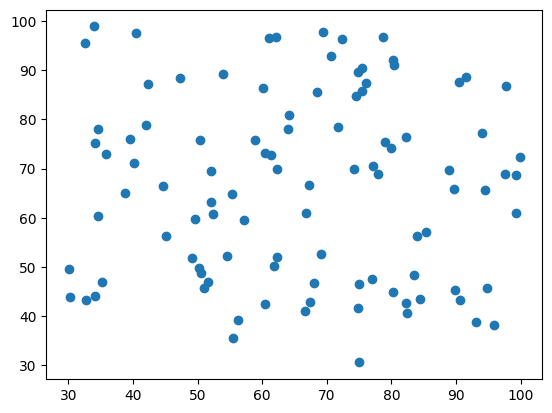

Number of class 0: 40
Number of class 1: 60


In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

print(f'Number of class 0: {len(data[labels == 0])}')
print(f'Number of class 1: {len(data[labels == 1])}')

## SECTION B

Initialize cluster object names clust with k=2:

In [5]:
clust = Kmeans(n_clusters=2)

Fit the data:

In [6]:
clust.fit(data)

Plot the clustered data with centroids:

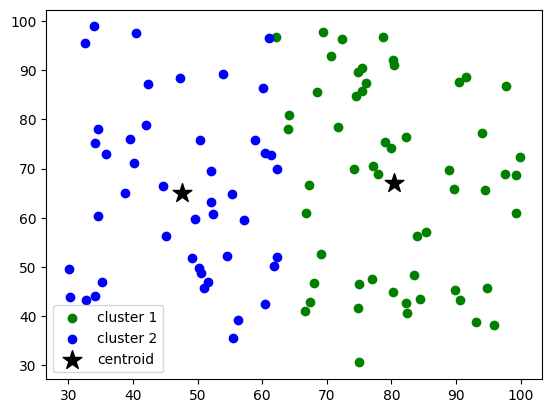

In [7]:
labels = clust.labels
centroids = clust.centroids

c0 = data[labels == 0]
c1 = data[labels == 1]

plt.scatter(c0[:,0], c0[:,1], c='green', label='cluster 1')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()

plt.show()

## SECTION C

In [8]:
sse = []
list_k = list(range(1, 11))

for k in list_k:
	clust = Kmeans(n_clusters=k)
	clust.fit(data)
	error_of_current_clustering = clust.error
	sse.append(error_of_current_clustering)

Plot sse against k:

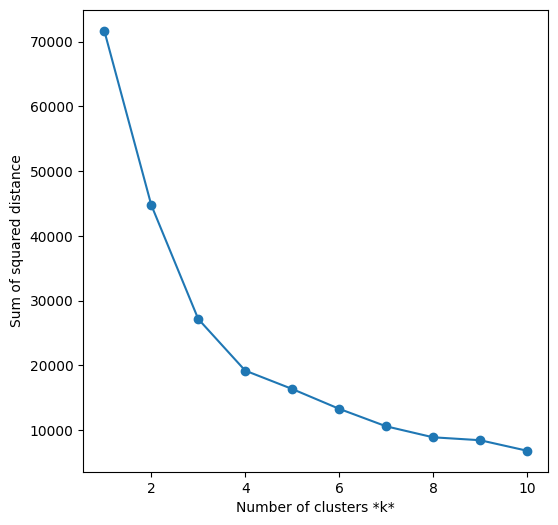

In [9]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

new k:

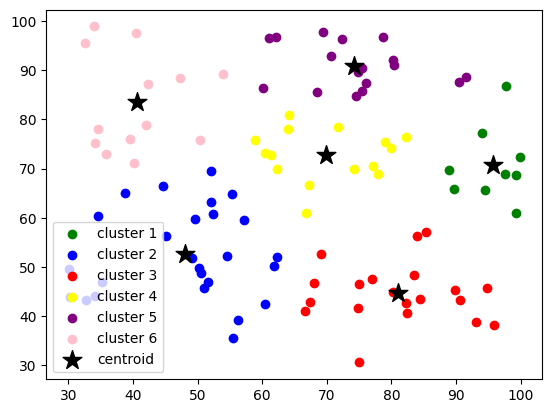

In [10]:
clust = Kmeans(n_clusters=6)
clust.fit(data)

labels = clust.labels
centroids = clust.centroids

c0 = data[labels == 0]
c1 = data[labels == 1]
c2 = data[labels == 2]
c3 = data[labels == 3]
c4 = data[labels == 4]
c5 = data[labels == 5]

plt.scatter(c0[:,0], c0[:,1], c='green', label='cluster 1')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='cluster 2')
plt.scatter(c2[:,0], c2[:,1], c='red', label='cluster 3')
plt.scatter(c3[:,0], c3[:,1], c='yellow', label='cluster 4')
plt.scatter(c4[:,0], c4[:,1], c='purple', label='cluster 5')
plt.scatter(c5[:,0], c5[:,1], c='pink', label='cluster 6')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()

plt.show()